In [1]:
import inspect
import matplotlib.pyplot as plt
import numpy as np

Equation 1 from [Lorenz (1996)](https://www.ecmwf.int/en/elibrary/10829-predictability-problem-partly-solved) is:
\begin{align}
\frac{d}{dt} X_j &= - X_{j-2} X_{j-1} + X{j-1} X_{j+1} - X_j + F
\end{align}
where $F$ is a constant independent of $j=1,2,\ldots,J$.

The following function returns the rate of change $\frac{d}{dt} X_j$.

In [2]:
from L96_model import Lorenz_96
print( inspect.getsource(Lorenz_96) )

def Lorenz_96(X,t,F):
    """
    Calculate the time rate of change for the X variables for the Lorenz '96.
    Args:
        X : Values of X variables at the current time step
        F : Forcing term
        t : Time
    Returns:
        dXdt : Array of X time tendencies
    """

    J = len(X)
    s = np.zeros(J)
    
    for j in range(J):
        s[j] = (X[(j+1)%J]-X[j-2])*X[j-1]-X[j]
    dXdt = s.T + F
    return dXdt



We can 

In [3]:
from L96_model import integrator, EulerFwd, RK2, RK4
print( inspect.getsource(RK4) )
print( inspect.getsource(integrator) )

def RK4(fn, dt, X, t, F):
    """
    Calculate the new state X(n+1) for d/dt X = fn(X,t,F) using the fourth order Runge-Kutta method.
    Args:
        fn : The function returning the time rate of change of model variables X
        dt : The time step
        X  : Values of X variables at the current time, t
        t  : Time at beginning of time step
        F  : Forcing term
    Returns:
        X at t+dt
    """
    Xdot1 = fn(X, t, F)
    Xdot2 = fn(X+0.5*dt*Xdot1, t+0.5*dt, F)
    Xdot3 = fn(X+0.5*dt*Xdot2, t+0.5*dt, F)
    Xdot4 = fn(X+dt*Xdot3, t+dt, F)
    return X + (dt/6.) * ( ( Xdot1 + Xdot4 ) + 2. * ( Xdot2 + Xdot3 ) )

def integrator(fn, method, dt, X0, F, nt):
    """
    Integrates forward-in-time the model "fn" using the integration "method". Returns the full history.
    
    Args:
        fn     : The function returning the time rate of change of model variables X
        method : The function returning the time rate of change of model variables X
        dt     : Th

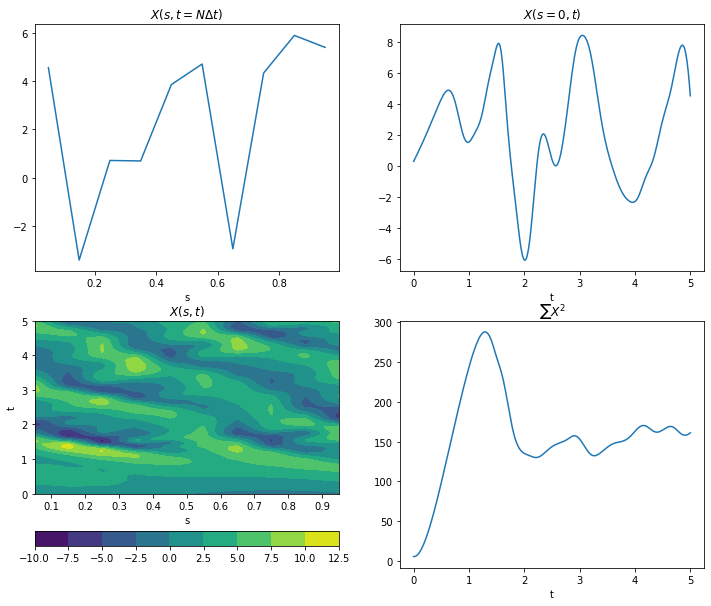

In [4]:
J = 10
s = ( 0.5 + np.arange(J) ) / J
X,t = integrator(Lorenz_96, RK4, 0.02, np.sin( 2.*np.pi*s ), 8., 250 )

plt.figure(figsize=(12,10))
plt.subplot(221); plt.plot(s, X[-1]); plt.xlabel('s'); plt.title('$X(s,t=N\Delta t)$');
plt.subplot(222); plt.plot(t, X[:,0]); plt.xlabel('t'); plt.title('$X(s=0,t)$');
plt.subplot(223); plt.contourf(s,t,X); plt.colorbar(orientation='horizontal'); plt.xlabel('s'); plt.ylabel('t'); plt.title('$X(s,t)$');
plt.subplot(224); plt.plot(t, (X**2).sum(axis=-1)); plt.xlabel('t'); plt.title('$\sum X^2$');